# Oil Viscosity predicted model from NMR log using Machine Learning

## Libraries

In [1]:
# Auto carga de scripts 
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from process_data import *
from plots import *

import warnings
warnings.filterwarnings("ignore")

## Load Dataset

In [3]:
train_data, test_data, df = process_data()

## Exploring data

### Stats description

In [4]:
df.describe()

,T2lm (ms),Temperature (°F),TE (ms),Viscosity (cP),Temperature (K)
count,296.000000,296.000000,296.000000,296.000000,296.000000
mean,56.760992,145.716216,0.208243,12829.237875,145.716216
std,162.036179,79.925611,0.078059,60086.644328,79.925611
min,0.230000,78.800000,0.100000,0.870000,78.800000
25%,1.752545,86.000000,0.100000,38.238168,86.000000
50%,4.407970,122.000000,0.240000,442.495000,122.000000
75%,29.863601,185.450000,0.240000,3584.000000,185.450000
max,1239.900000,383.000000,0.300000,867634.810000,383.000000


### Distribution plots

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu S

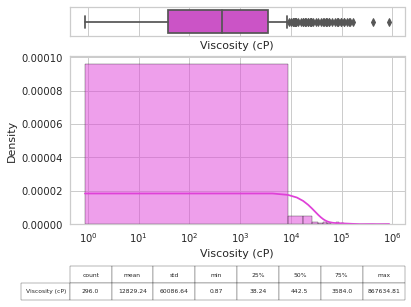

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


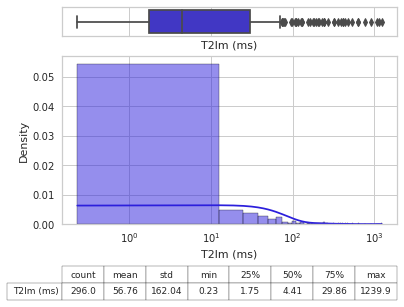

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


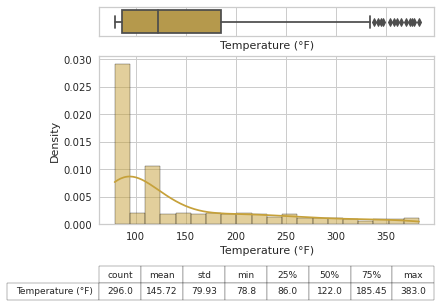

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


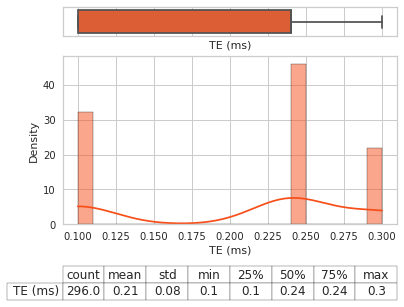

In [5]:
from plots import dist_box_stats

dist_box_stats(df, 'Viscosity (cP)', 'log', 100)
dist_box_stats(df, 'T2lm (ms)', 'log', 100)
dist_box_stats(df, 'Temperature (°F)', 'linear', 20)
dist_box_stats(df, 'TE (ms)', 'linear', 20)

### Pairplot

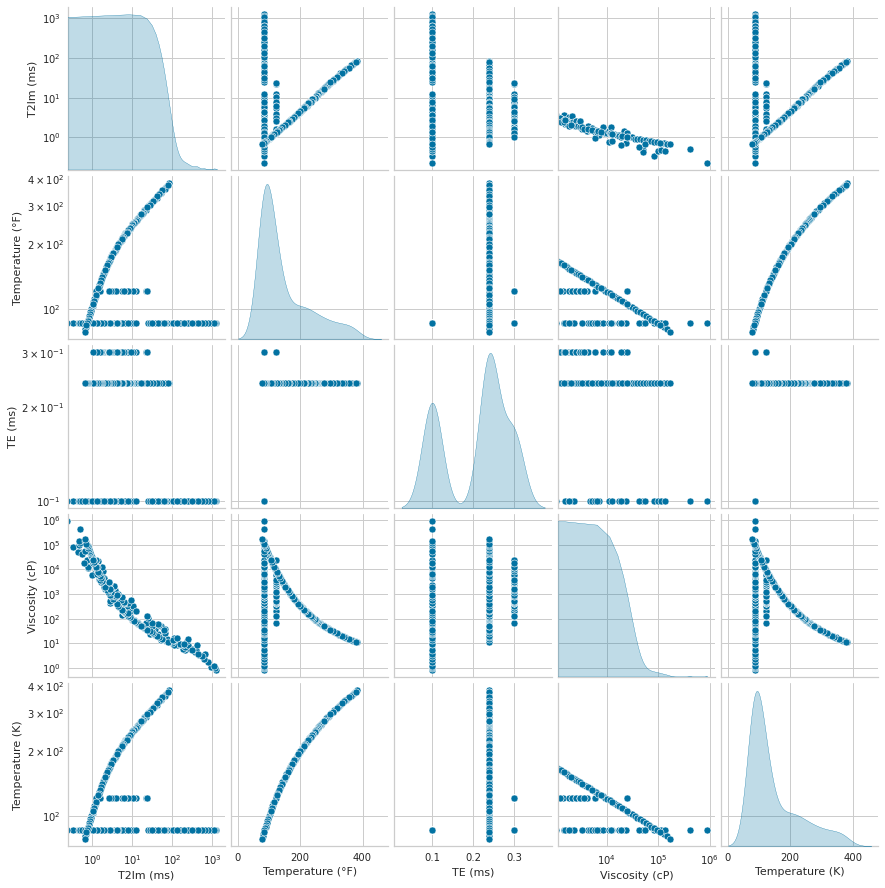

In [6]:
pplot(df)

### T2lm vs Viscosity plot

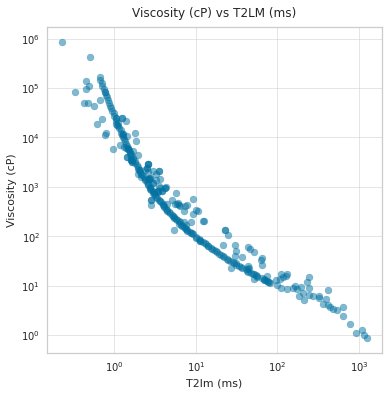

In [7]:
t2lm_visc(df)

### Correlation coeficient matrix plot - Spearman

In [8]:
df.columns

Index(['T2lm (ms)', 'Temperature (°F)', 'TE (ms)', 'Viscosity (cP)',
       'Temperature (K)'],
      dtype='object')

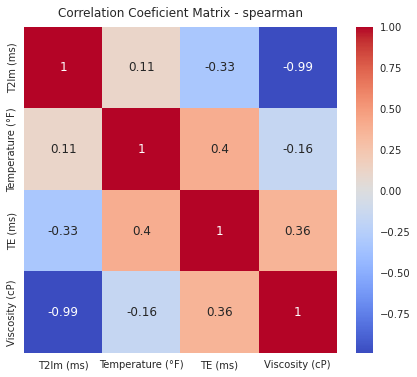

In [9]:
from plots import corr_plot

corr_plot(df[['T2lm (ms)', 'Temperature (°F)', 'TE (ms)', 'Viscosity (cP)']], 'spearman', (7,6), 'df')

## Feature Engineering

In [10]:
def feature_eng(df):
    df_fe = df.copy()
    df_fe['log(T2lm)'] = np.log(df['T2lm (ms)'])
    df_fe['log(Temp)'] = np.log(df['Temperature (°F)'])
    df_fe['log(TE)'] = np.log(df['TE (ms)'])
    df_fe['log(T2lm)/TE'] = np.log(df['T2lm (ms)'])/df['TE (ms)']
    df_fe['log(T2lm)/Temp'] = np.log(df['T2lm (ms)'])/df['Temperature (°F)']
    df_fe['log(T2lm)/TE'] = np.log(df['T2lm (ms)'])/df['TE (ms)']
    df_fe['log(Temp)/TE'] = np.log(df['Temperature (°F)'])/df['TE (ms)']
    df_fe['log(TE)'] = np.log(df['TE (ms)'])

    return df_fe

df_fe = feature_eng(df)

## Machine Learning algoritms

In [11]:
#Librerias Preprocesamiento y analisis
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

#Librerias de Metricas
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error

### Train Test Slip

In [12]:
X = df_fe[[
        'T2lm (ms)',
        'Temperature (°F)',
        'TE (ms)',
        'log(T2lm)',
        'log(Temp)',
        'log(TE)',
        'log(T2lm)/TE',
        'log(T2lm)/Temp',
        'log(Temp)/TE'
        ]]

y = np.log10(df_fe['Viscosity (cP)'])
# 
X_train, X_test, y_train, y_test = train_test_split(X.values,
                                                    y.values,
                                                    test_size=0.25,
                                                    random_state=42)
print(X.columns)

Index(['T2lm (ms)', 'Temperature (°F)', 'TE (ms)', 'log(T2lm)', 'log(Temp)',
       'log(TE)', 'log(T2lm)/TE', 'log(T2lm)/Temp', 'log(Temp)/TE'],
      dtype='object')


### DecisionTree - Feature Importance

============== Regression Metrics : DecisionTreeRegressor ===============
MAE_train: 6026.81		 MAE_test: 2314.68
RMSE_train: 42012.63391937287	 RMSE_test: 9320.357799236052
R²_train: 0.99			 R²_test: 0.98


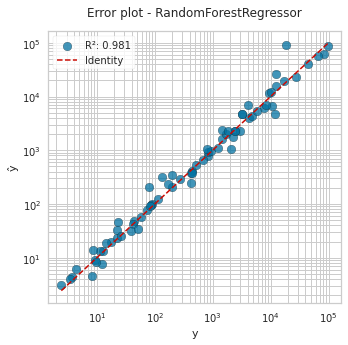

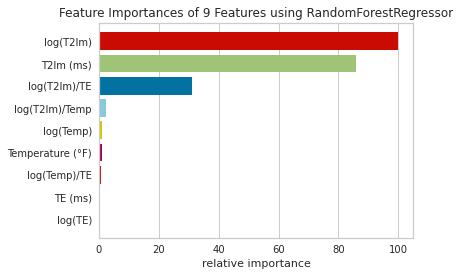

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(max_depth=5)

RFR.fit(X_train, y_train)

y_test_DTR = RFR.predict(X_test)
y_train_DTR = RFR.predict(X_train)

regression_metrics('DecisionTreeRegressor', y_train, y_train_DTR, y_test, y_test_DTR)
regression_plots(y_test, y_test_DTR, 'RandomForestRegressor')
feature_importance(RFR, X, y)


### Feature Selection

In [14]:
X = df_fe[[
        # 'T2lm (ms)',
        # 'Temperature (°F)',
        # 'TE (ms)',
        'log(T2lm)',
        # 'log(Temp)',
        # 'log(TE)',
        # 'T2lm^2',
        # 'Temp^2',
        # 'TE^2',
        'log(T2lm)/TE',
        'log(T2lm)/Temp',
        # 'log(Temp)/TE'
        ]]
# 
y = np.log10(df_fe['Viscosity (cP)'])

X_train, X_test, y_train, y_test = train_test_split(X.values,
                                                    y.values,
                                                    test_size=0.25,
                                                    random_state=42)
print(X.columns)

Index(['log(T2lm)', 'log(T2lm)/TE', 'log(T2lm)/Temp'], dtype='object')


### Multilinear regresor

============== Regression Metrics : Linear Regression ===============
MAE_train: 10952.51		 MAE_test: 3749.67
RMSE_train: 60964.04806763206	 RMSE_test: 12176.82410001131
R²_train: 0.94			 R²_test: 0.93


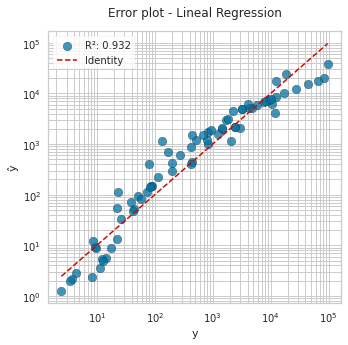

In [15]:
from sklearn.linear_model import LinearRegression

MLR = LinearRegression()

MLR.fit(X_train, y_train)
y_test_MLR = MLR.predict(X_test)
y_train_MLR = MLR.predict(X_train)

regression_metrics('Linear Regression', y_train, y_train_MLR, y_test, y_test_MLR)
regression_plots(y_test, y_test_MLR, 'Lineal Regression')

### K-Nearest Neighbors for Regression

============== Regression Metrics : K-Nearest Neighbors ===============
MAE_train: 6920.43		 MAE_test: 2167.13
RMSE_train: 52572.22791936058	 RMSE_test: 7746.845779335277
R²_train: 0.98			 R²_test: 0.97


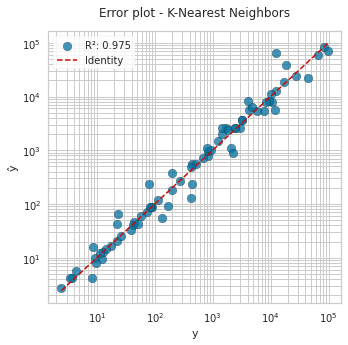

In [16]:
from sklearn import neighbors

KNN = neighbors.KNeighborsRegressor(n_neighbors = 3)

KNN.fit(X_train, y_train)
y_test_KNN = KNN.predict(X_test)
y_train_KNN = KNN.predict(X_train)

regression_metrics('K-Nearest Neighbors', y_train, y_train_KNN, y_test, y_test_KNN)
regression_plots(y_test, y_test_KNN, 'K-Nearest Neighbors')


### Support Vector Machine

============== Regression Metrics : SVR_rbf ===============
MAE_train: 9030.4		 MAE_test: 3467.97
RMSE_train: 55635.07702944376	 RMSE_test: 11798.401052568342
R²_train: 0.97			 R²_test: 0.97


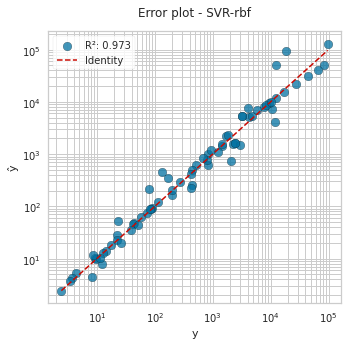

In [17]:
from sklearn.svm import SVR

SVR_model = SVR(kernel='rbf', C=256, degree=1, tol=0.01, epsilon=0.05)

SVR_model.fit(X_train, y_train)
y_test_SVR = SVR_model.predict(X_test)
y_train_SVR = SVR_model.predict(X_train)

regression_metrics('SVR_rbf', y_train, y_train_SVR, y_test, y_test_SVR)
regression_plots(y_test, y_test_SVR, 'SVR-rbf')

### Decision Tree Regressor

============== Regression Metrics : DecisionTreeRegressor ===============
MAE_train: 3766.22		 MAE_test: 2917.73
RMSE_train: 22195.15946435689	 RMSE_test: 12448.448901236683
R²_train: 0.99			 R²_test: 0.97


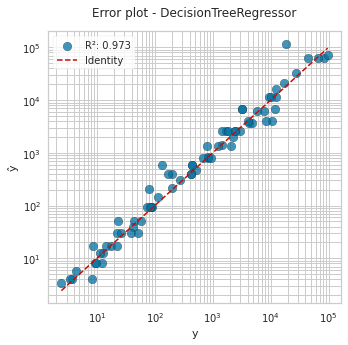

In [18]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor(max_depth=6)

DTR.fit(X_train, y_train)

y_test_DTR = DTR.predict(X_test)
y_train_DTR = DTR.predict(X_train)

regression_metrics('DecisionTreeRegressor', y_train, y_train_DTR, y_test, y_test_DTR)
regression_plots(y_test, y_test_DTR, 'DecisionTreeRegressor')


### Neural Network

============== Regression Metrics : MLPR ===============
MAE_train: 9284.65		 MAE_test: 3708.68
RMSE_train: 47727.246788015655	 RMSE_test: 12346.078720163385
R²_train: 0.98			 R²_test: 0.98


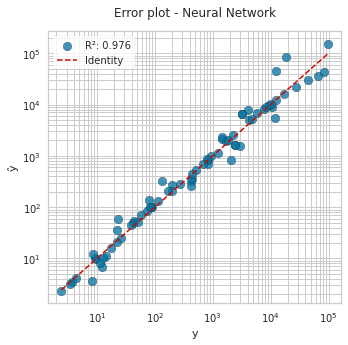

In [19]:
from sklearn.neural_network import MLPRegressor

MLPR = MLPRegressor(
    activation='logistic',
    alpha=1e-05,
    hidden_layer_sizes=(1, 2, 2),
    random_state=42,
    solver='lbfgs')

MLPR.fit(X_train, y_train)
y_test_MLPR = MLPR.predict(X_test)
y_train_MLPR = MLPR.predict(X_train)

regression_metrics('MLPR', y_train, y_train_MLPR, y_test, y_test_MLPR)
regression_plots(y_test, y_test_MLPR, 'Neural Network')

## Preview Models

In [30]:
# from preview_model import *
# data = test_data.append([train_data])

# for i in [Morris, Vinegar, Straley, Lo, Zhang, Cheng, Sandor]:
#     i(df)

## Validation with Colombian oil data

In [21]:
well_data = well_log_data()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


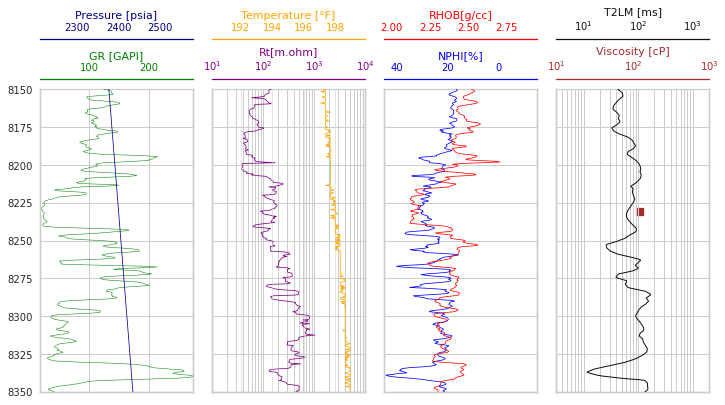

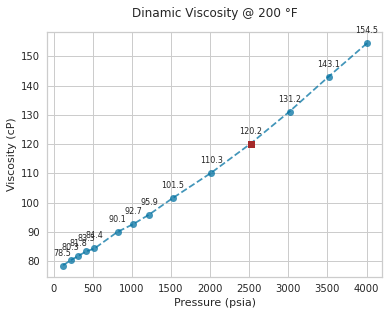

In [22]:
triple_combo_plot(well_data, 8150,8350)
visc_well()

In [23]:
well_val = pd.DataFrame(
    data = {
        'T2lm (ms)': 64.3017,
        'Temperature (°F)': 198.7,
        'TE (ms)': 0.475,
        'Viscosity (cP)': 120.167,
        'Temperature (K)': 366.483
        },
        index=[0])

well_val_fe = feature_eng(well_val)

X_val = well_val_fe[X.columns].values
y_val = np.log10(well_val_fe['Viscosity (cP)']).values


print('Multi linear regression model\t', f'Real data: {10**y_val}\t', f'Predicted data: {10**MLR.predict(X_val)}')
print('K-Nearest Neighbors model\t', f'Real data: {10**y_val}\t', f'Predicted data: {10**KNN.predict(X_val)}')
print('Support Vector Regressor model\t', f'Real data: {10**y_val}\t', f'Predicted data: {10**SVR_model.predict(X_val)}')
print('Decision Tree Regressor model\t', f'Real data: {10**y_val}\t', f'Predicted data: {10**DTR.predict(X_val)}')
print('Multilayer Perceptron model\t', f'Real data: {10**y_val}\t', f'Predicted data: {10**MLPR.predict(X_val)}')

Multi linear regression model	 Real data: [120.167]	 Predicted data: [3.25666733]
K-Nearest Neighbors model	 Real data: [120.167]	 Predicted data: [122.52353527]
Support Vector Regressor model	 Real data: [120.167]	 Predicted data: [8.51380737]
Decision Tree Regressor model	 Real data: [120.167]	 Predicted data: [17.35500296]
Multilayer Perceptron model	 Real data: [120.167]	 Predicted data: [23.22191167]


In [24]:
# from preview_model import *
# for i in [Morris, Vinegar, Straley, Lo, Zhang, Cheng, Sandor]:
#     i(well_val)

In [25]:
metrics_ml = pd.DataFrame(
    {
'Model': ['Linear Regresion','K-Nearest Neighbors','Support Vector Machine','Decision Tree Regressor'],
'R2':[0.932,0.975,0.973,0.972],
'RMSE':[12176.82,7746.84,11798.4,12528.25], 
'MAE':[3749.67,2167.13,3467.97,3053.27]
}
).set_index('Model')

In [26]:
metrics_ml

,R2,RMSE,MAE
Model,,,
Linear Regresion,0.932,12176.82,3749.67
K-Nearest Neighbors,0.975,7746.84,2167.13
Support Vector Machine,0.973,11798.40,3467.97
Decision Tree Regressor,0.972,12528.25,3053.27


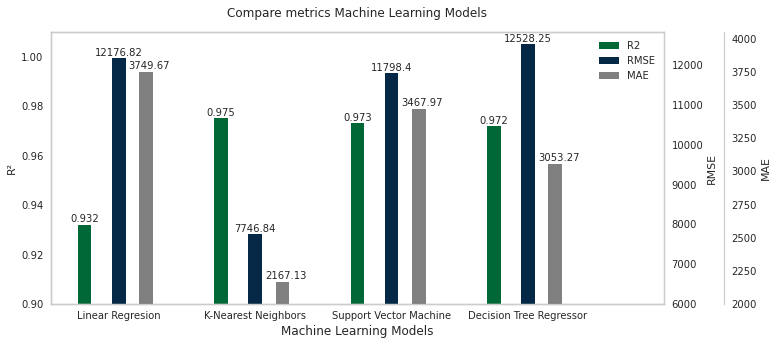

In [27]:
compare_ml(metrics_ml, 'ml')


In [40]:
metrics_prev = pd.DataFrame(
    {
'Model': ['Morris','Vinegar','Lo','Zhang', 'Cheng', 'Sandor'],
'R2':[0.33,0.31,0.6,0.52,0.6,0.863],
'RMSE':[8189.71,61184.37,60969.81,61063.88,30152.18,19984.88], 
'MAE':[1645.37,12653.3,12451.45,12535.1,7678.77,2832.21,]
}
).set_index('Model')

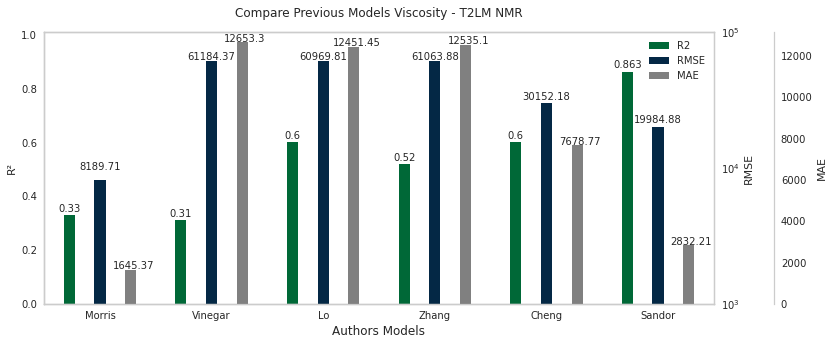

In [81]:
compare_prev(metrics_prev, 'previus_model')

In [96]:
error = pd.DataFrame({'Model':
['Linear Regresion',
'K-Nearest Neighbors',
'Support Vector Machine',
'Decision Tree Regressor',
'Morris',
'Vinegar',
'Lo',
'Zhang',
'Cheng',
'Sandor'],
'error':
[-116.9104,
2.3565,
-111.657,
-102.817,
106.233,
-22.967,
-54.467,
-40.667,
-17.367,
-38.867]}).set_index('Model')



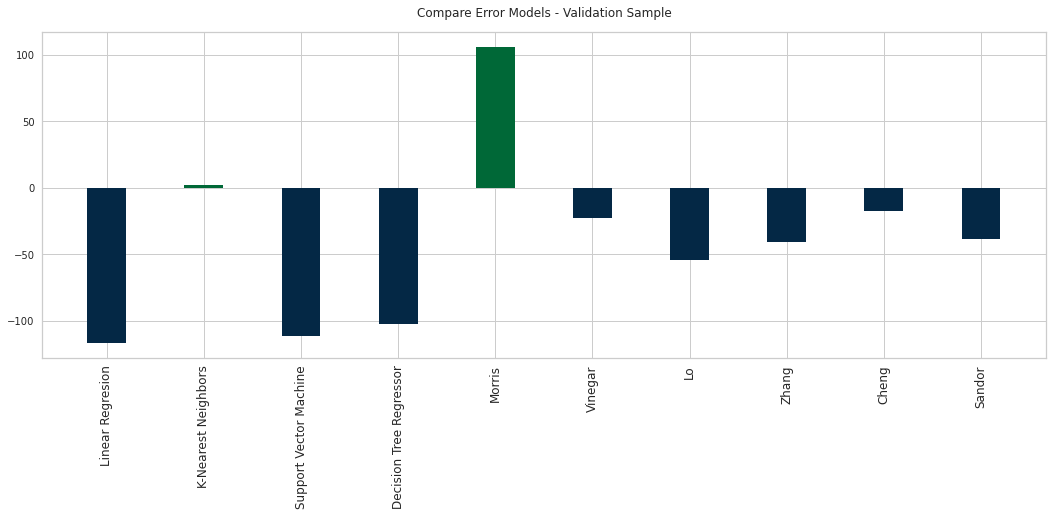

In [137]:
fig,ax = plt.subplots(figsize=(18,6))
plt.title('Compare Error Models - Validation Sample', pad=15)
labels = error.index.tolist()
width = 0.4
x = np.arange(len(labels))
ax.bar(
    x,
    error['error'],
    width=width,
    color=(error['error'] > 0).map({True: '#006837', False: '#042845'}),
    align='center'
    )
ax.set_xticks(x)
ax.set_xticklabels(labels, fontdict={'fontsize':12}, rotation=90)
plt.savefig(f'../reports/figures/compare_validation.png', dpi=500, bbox_inches='tight', transparent = True)

plt.show();